### The purpose of this project is to determine whether a specific person's annual salary is more than 50k USD. Numerous features are used to predict the label. I have done this through Logistic Regression and Deep Learning methods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [49]:
df = pd.read_csv('salary.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

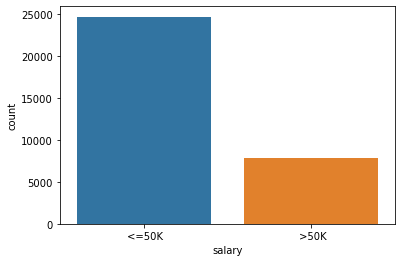

In [9]:
sns.countplot(df['salary'])

## note that the number of two classes of salary are not equal so the model wont be that accurate.

In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

## NO missing values found

In [ ]:
pd.get_dummies(df['workclass','education','education_num'],)

In [39]:
df['education-num'].nunique()

16

In [43]:
df['education'].nunique()

16

In [44]:
df[df['education-num']==13]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32533,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32536,34,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K


## education and education num is the same thing as education is encoded as 'education_num' so we will drop education column

In [50]:
df.drop('education',axis=1,inplace=True)

In [52]:
df.head(2)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [53]:
df['native-country'].nunique()

42

In [54]:
df.select_dtypes(['object']).columns

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'salary'],
      dtype='object')

In [61]:
df1 = pd.get_dummies(df,drop_first=True,columns=['race','sex','salary','relationship','occupation','workclass', 'marital-status','native-country'])

In [63]:
df1

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [65]:
from sklearn.model_selection import train_test_split

In [89]:
X = df1.drop('salary_ >50K',axis=1).values
y = df1['salary_ >50K'].values

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr = LogisticRegression()

In [74]:
lr.fit(X_train,y_train)

LogisticRegression()

In [76]:
preds = lr.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix,classification_report

In [80]:
print(confusion_matrix(y_test,preds))

[[7222  233]
 [1699  615]]


In [81]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7455
           1       0.73      0.27      0.39      2314

    accuracy                           0.80      9769
   macro avg       0.77      0.62      0.64      9769
weighted avg       0.79      0.80      0.77      9769



##  Accuracy is 80%

# Now lets try to solve this with Deep Learning technique

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler = MinMaxScaler()

In [92]:
scaler.fit(X_train)

MinMaxScaler()

In [93]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [96]:
from tensorflow.keras.callbacks import EarlyStopping

In [95]:
X_train.shape

(22792, 85)

In [97]:
model = Sequential()


model.add(Dense(units=85,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=42,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=21,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [98]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [99]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
713/713 [==============================] - 1s 1ms/step - loss: 0.4683 - val_loss: 0.3812
Epoch 2/600
713/713 [==============================] - 1s 1ms/step - loss: 0.4047 - val_loss: 0.3534
Epoch 3/600
713/713 [==============================] - 1s 1ms/step - loss: 0.3799 - val_loss: 0.3430
Epoch 4/600
713/713 [==============================] - 1s 1ms/step - loss: 0.3688 - val_loss: 0.3339
Epoch 5/600
713/713 [==============================] - 1s 1ms/step - loss: 0.3579 - val_loss: 0.3286
Epoch 6/600
713/713 [==============================] - 1s 1ms/step - loss: 0.3516 - val_loss: 0.3276
Epoch 7/600
713/713 [==============================] - 1s 1ms/step - loss: 0.3469 - val_loss: 0.3226
Epoch 8/600
713/713 [==============================] - 1s 1ms/step - loss: 0.3430 - val_loss: 0.3195
Epoch 9/600
713/713 [==============================] - 1s 1ms/step - loss: 0.3393 - val_loss: 0.3238
Epoch 10/600
713/713 [==============================] - 1s 1ms/step - loss: 0.3391 - val_lo

<AxesSubplot:>

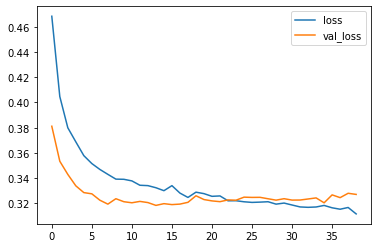

In [100]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [106]:
pred = (model.predict(X_test) > 0.5).astype("int32")

In [107]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[6861  594]
 [ 807 1507]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      7455
           1       0.72      0.65      0.68      2314

    accuracy                           0.86      9769
   macro avg       0.81      0.79      0.80      9769
weighted avg       0.85      0.86      0.85      9769



## Deep Learning helped increase our model accuracy by 6%, now the accuracy is 86%